In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 4

In [ ]:
from fastai import *
from fastai.text import *
from sortedcontainers import SortedList
from sortedcontainers import SortedSet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = Path("/content/drive/My Drive/Colab Notebooks/Genre Classification/rawdata")

In [ ]:
df = pd.read_csv(path/'MSI_IMDB.csv')
df

,Unnamed: 0,Title,plot,genre
0,0,Megamind,"When a planet is about to be destroyed, two al...","Animation,Action,Comedy,Family,Sci-Fi"
1,1,Slumdog Millionaire,"The story of Jamal Malik, an 18 year-old orpha...","Drama,Romance"
2,2,Om Shanti Om,Om Prakash is a junior artist and has dreams t...,"Action,Comedy,Drama,Musical,Romance,Thriller"
3,3,The Silence of the Lambs,F.B.I. trainee Clarice Starling (Jodie Foster)...,"Crime,Drama,Thriller"
4,4,Terminator 2: Judgment Day,Over 10 years have passed since the first mach...,"Action,Sci-Fi"
...,...,...,...,...
434,434,Naruto: Shippûden,"Naruto Uzumaki, is a loud, hyperactive, adoles...","Animation,Action,Adventure,Comedy,Drama,Fantasy"
435,435,No Dorai,"In a small beach town in Bangladesh, fearless ...",Drama
436,436,Bhoothnath,"Aditya is an Engineer on a cruise line, and li...","Comedy,Drama,Family,Fantasy"
437,437,The Wolf of Wall Street,"In 1987, Jordan Belfort procures a job as a Wa...","Biography,Crime,Drama"


In [ ]:
genre = []
X = df['Genres']
for i in range(len(X)):
  y = X[i]
  s = ""
  for j in range(len(y)):
    if y[j]!=' ' :
      s += y[j]
  genre.append(s)
df['genre']=genre

In [ ]:
X = df[['Title','plot','genre']]
data = pd.DataFrame(data=X,columns=['Title','plot','genre'])
data

,Title,plot,genre
0,Megamind,"When a planet is about to be destroyed, two al...","Animation,Action,Comedy,Family,Sci-Fi"
1,Slumdog Millionaire,"The story of Jamal Malik, an 18 year-old orpha...","Drama,Romance"
2,Om Shanti Om,Om Prakash is a junior artist and has dreams t...,"Action,Comedy,Drama,Musical,Romance,Thriller"
3,The Silence of the Lambs,F.B.I. trainee Clarice Starling (Jodie Foster)...,"Crime,Drama,Thriller"
4,Terminator 2: Judgment Day,Over 10 years have passed since the first mach...,"Action,Sci-Fi"
...,...,...,...
434,Naruto: Shippûden,"Naruto Uzumaki, is a loud, hyperactive, adoles...","Animation,Action,Adventure,Comedy,Drama,Fantasy"
435,No Dorai,"In a small beach town in Bangladesh, fearless ...",Drama
436,Bhoothnath,"Aditya is an Engineer on a cruise line, and li...","Comedy,Drama,Family,Fantasy"
437,The Wolf of Wall Street,"In 1987, Jordan Belfort procures a job as a Wa...","Biography,Crime,Drama"


In [ ]:
# data.to_csv(path/'MSI_IMDB.csv')

In [ ]:
path = Path("/content/drive/My Drive/Colab Notebooks/Genre Classification/rawdata")

In [ ]:
df = pd.read_csv(path/'MSI_IMDB.csv')
df

,Unnamed: 0,Title,plot,genre
0,0,Megamind,"When a planet is about to be destroyed, two al...","Animation,Action,Comedy,Family,Sci-Fi"
1,1,Slumdog Millionaire,"The story of Jamal Malik, an 18 year-old orpha...","Drama,Romance"
2,2,Om Shanti Om,Om Prakash is a junior artist and has dreams t...,"Action,Comedy,Drama,Musical,Romance,Thriller"
3,3,The Silence of the Lambs,F.B.I. trainee Clarice Starling (Jodie Foster)...,"Crime,Drama,Thriller"
4,4,Terminator 2: Judgment Day,Over 10 years have passed since the first mach...,"Action,Sci-Fi"
...,...,...,...,...
434,434,Naruto: Shippûden,"Naruto Uzumaki, is a loud, hyperactive, adoles...","Animation,Action,Adventure,Comedy,Drama,Fantasy"
435,435,No Dorai,"In a small beach town in Bangladesh, fearless ...",Drama
436,436,Bhoothnath,"Aditya is an Engineer on a cruise line, and li...","Comedy,Drama,Family,Fantasy"
437,437,The Wolf of Wall Street,"In 1987, Jordan Belfort procures a job as a Wa...","Biography,Crime,Drama"


In [ ]:
import seaborn as sns
import nltk

['A', 'n', 'i', 'm', 'a', 't', 'i', 'o', 'n', ',', ' ', 'A', 'c', 't', 'i', 'o', 'n', ',', ' ', 'C', 'o', 'm', 'e', 'd', 'y', ',', ' ', 'F', 'a', 'm', 'i', 'l', 'y', ',', ' ', 'S', 'c', 'i', '-', 'F', 'i', 'D', 'r', 'a', 'm', 'a', ',', ' ', 'R', 'o', 'm', 'a', 'n', 'c', 'e', 'A', 'c', 't', 'i', 'o', 'n', ',', ' ', 'C', 'o', 'm', 'e', 'd', 'y', ',', ' ', 'D', 'r', 'a', 'm', 'a', ',', ' ', 'M', 'u', 's', 'i', 'c', 'a', 'l', ',', ' ', 'R', 'o', 'm', 'a', 'n', 'c', 'e', ',', ' ', 'T', 'h', 'r', 'i', 'l', 'l', 'e', 'r', 'C', 'r', 'i', 'm', 'e', ',', ' ', 'D', 'r', 'a', 'm', 'a', ',', ' ', 'T', 'h', 'r', 'i', 'l', 'l', 'e', 'r', 'A', 'c', 't', 'i', 'o', 'n', ',', ' ', 'S', 'c', 'i', '-', 'F', 'i', 'A', 'c', 't', 'i', 'o', 'n', ',', ' ', 'A', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', ',', ' ', 'S', 'c', 'i', '-', 'F', 'i', ',', ' ', 'T', 'h', 'r', 'i', 'l', 'l', 'e', 'r', 'A', 'n', 'i', 'm', 'a', 't', 'i', 'o', 'n', ',', ' ', 'A', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', ',', ' ', 'C', 'o', 'm',

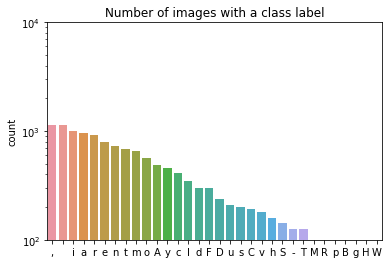

In [ ]:
all_labels = [label for lbs in df['Genres'] for label in lbs]
labels_count = Counter(all_labels)
ax = sns.countplot(all_labels, order=[k for k, _ in labels_count.most_common()], log=True)
ax.set_title('Number of images with a class label')
ax.set_ylim(1E2, 1E4)
print(all_labels)

In [ ]:
>>> from sortedcontainers import SortedList
>>> sl = SortedList(['e', 'a', 'c', 'd', 'b'])
>>> sl
SortedList(['a', 'b', 'c', 'd', 'e'])
>>> sl *= 10_000_000
>>> sl.count('c')
10000000
>>> sl[-3:]
['e', 'e', 'e']
>>> from sortedcontainers import SortedDict
>>> sd = SortedDict({'c': 3, 'a': 1, 'b': 2})
>>> sd
SortedDict({'a': 1, 'b': 2, 'c': 3})
>>> sd.popitem(index=-1)
('c', 3)
>>> from sortedcontainers import SortedSet
>>> ss = SortedSet('abracadabra')
>>> ss
SortedSet(['a', 'b', 'c', 'd', 'r'])
>>> ss.bisect_left('c')
2

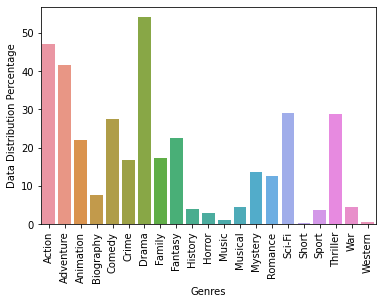

In [ ]:
all_labels = []
X = np.asarray(df['genre'])
for i in range(len(df['genre'])):
  y = df['genre'][i]
  s = ""
  for j in range(len(y)):
    if y[j] != ',' :
      s+=y[j]
    else :
      all_labels.append(s)
      s = ""
  all_labels.append(s)

all_genres = SortedSet(all_labels)
genres = SortedList(all_labels)
cnt = []
for i in range(len(all_genres)):
  x = (genres.count(all_genres[i])/438)*100
  cnt.append(x)
all_genres = np.asarray(all_genres)
ax = sns.barplot(x = all_genres, y = cnt,)
# ax.set_title('Number of images with a class label')
# heat.set_xlabel('Predicted Label')
# heat.set_ylabel('True Label')
ax.set_xlabel('Genres')
ax.set_ylabel('Data Distribution Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# binary = np.array([[11, 2],
#                    [3, 5]])

# fig, ax = plot_confusion_matrix(conf_mat=binary,
#                                 show_absolute=False,
#                                 show_normed=True,
#                                 colorbar=True)
# plt.show()